reference of dataset: https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

# Preparation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 경고 표시 제거
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
df_ott = pd.read_csv('tv_shows.csv')

df_ott.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


* age는 시청 가능 연령대를 표시한 것
* Rotten Tomatoes는 영화의 평점
* 1은 해당 기업이 컨텐츠를 소유하고 있다는 뜻이며, 0일 경우 컨텐츠가 없는 것이다.

# Summary of dataset

In [10]:
df_ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [11]:
df_ott.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.0
mean,2683.500000,2814.945790,2012.628726,0.367176,0.301975,0.341095,0.065387,1.0
std,1549.752453,1672.385727,10.142813,0.482080,0.459157,0.474122,0.247231,0.0
min,0.000000,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1341.750000,1345.750000,2011.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2683.500000,2788.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4025.250000,4308.250000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,5367.000000,5717.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.0


missing values

In [12]:
df_ott.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

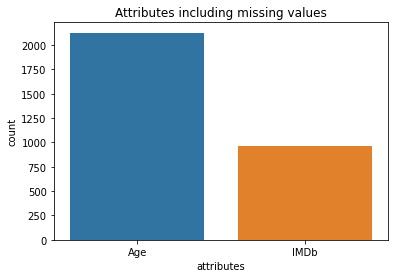

In [13]:
age_missing = df_ott['Age'].isnull().sum()
imdb_missing = df_ott['IMDb'].isnull().sum()

x = ['Age', 'IMDb']
y = [age_missing, imdb_missing]

sns.barplot(x, y)
plt.title('Attributes including missing values')
plt.xlabel('attributes')
plt.ylabel('count')
plt.show()

In [14]:
del df_ott['Unnamed: 0']
del df_ott['ID']
del df_ott['Type']

df_ott['IMDb'] = df_ott['IMDb'].str.replace('/10', '')
df_ott['IMDb'] = df_ott['IMDb'].astype(float)

df_ott['Rotten Tomatoes'] = df_ott['Rotten Tomatoes'].str.replace("/100", '')
df_ott['Rotten Tomatoes'] = df_ott['Rotten Tomatoes'].astype(int)

df_ott.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.4,100,1,0,0,0
1,Stranger Things,2016,16+,8.7,96,1,0,0,0
2,Attack on Titan,2013,18+,9.0,95,1,1,0,0
3,Better Call Saul,2015,18+,8.8,94,1,0,0,0
4,Dark,2017,16+,8.8,93,1,0,0,0


# matrices

correlation matrix

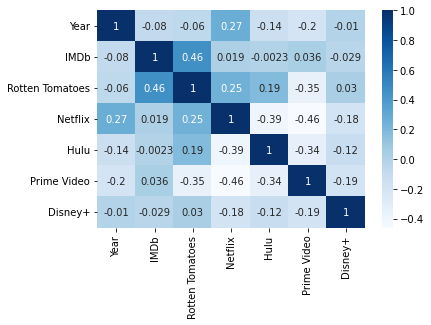

In [15]:
sns.heatmap(df_ott.corr(), annot=True, cmap='Blues')
plt.show()

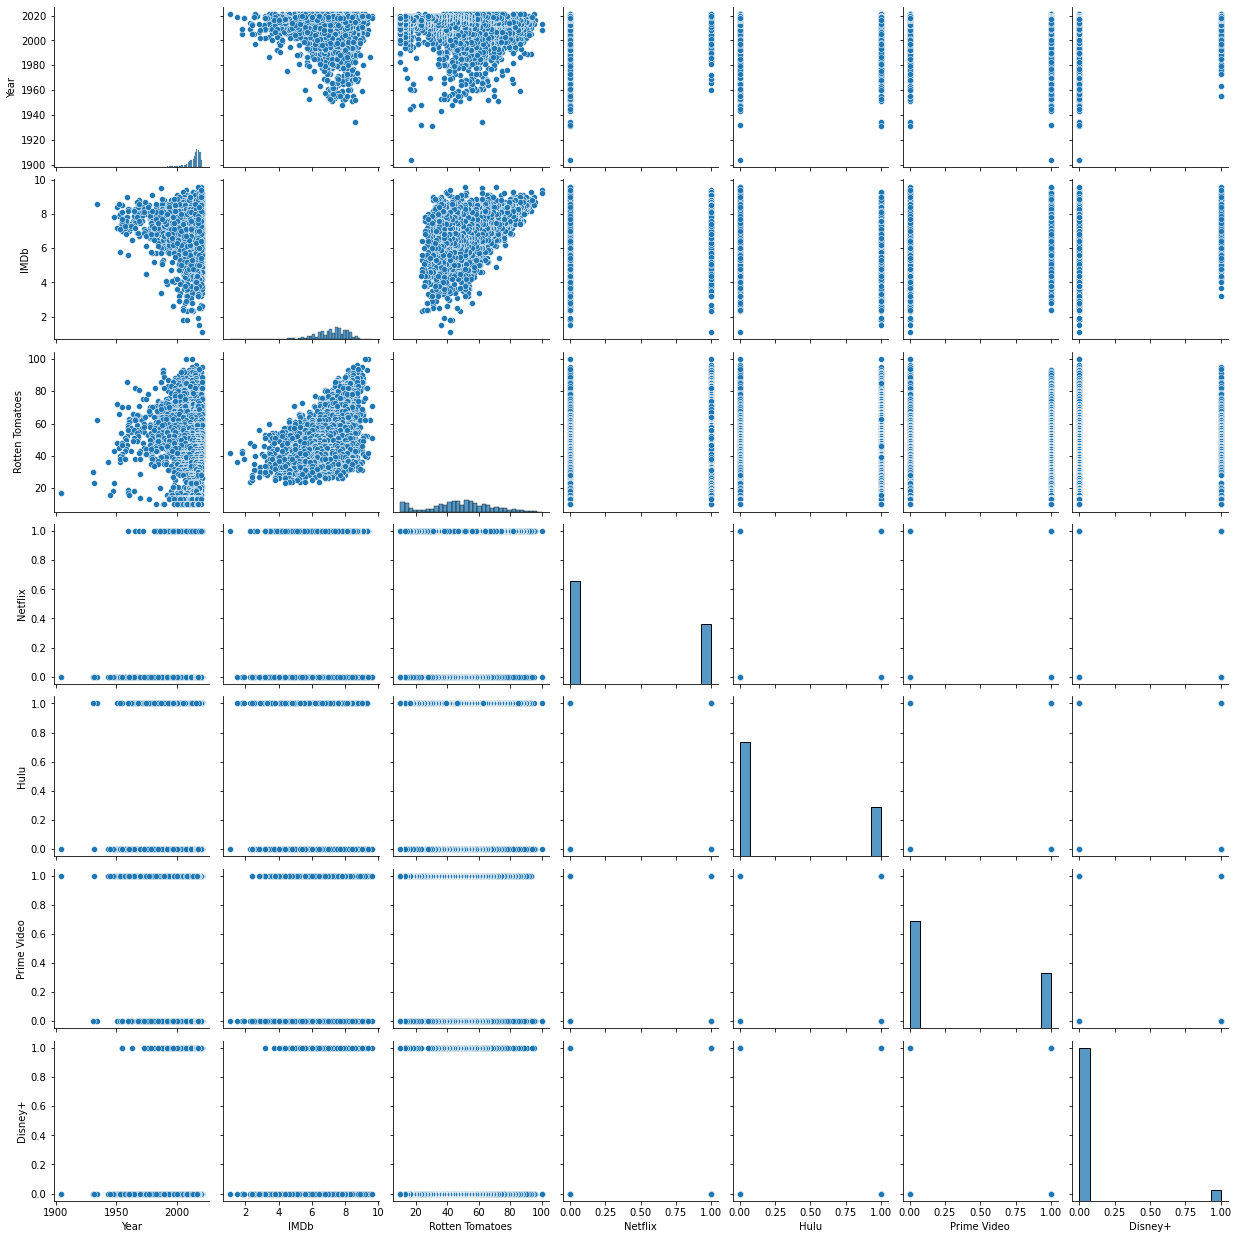

In [16]:
sns.pairplot(df_ott, palette='husl')
plt.show()

# amount of contents(company)

A number of contents that Netflix has

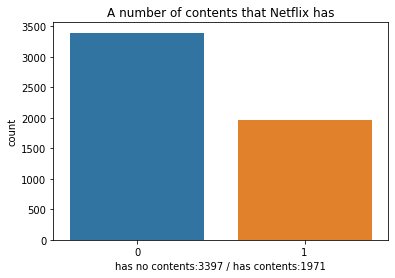

In [17]:
contents_netflix = pd.DataFrame(df_ott['Netflix'].value_counts()).reset_index()

sns.barplot(x=contents_netflix['index'], y=contents_netflix['Netflix'])
plt.title('A number of contents that Netflix has')
plt.xlabel('has no contents:{} / has contents:{}'.format(contents_netflix['Netflix'][0], contents_netflix['Netflix'][1]))
plt.ylabel('count')
plt.show()

A number of contents that Hulu has

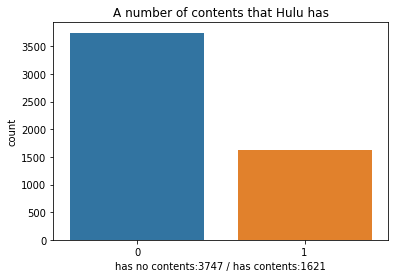

In [18]:
contents_hulu = pd.DataFrame(df_ott['Hulu'].value_counts()).reset_index()

sns.barplot(x=contents_hulu['index'], y=contents_hulu['Hulu'])
plt.title('A number of contents that Hulu has')
plt.xlabel('has no contents:{} / has contents:{}'.format(contents_hulu['Hulu'][0], contents_hulu['Hulu'][1]))
plt.ylabel('count')
plt.show()

A number of contents that Prime Video has

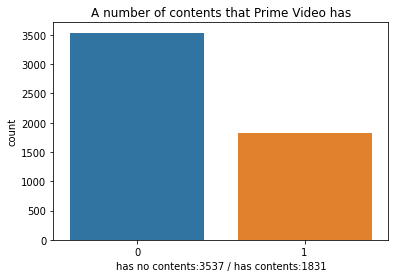

In [19]:
contents_prime = pd.DataFrame(df_ott['Prime Video'].value_counts()).reset_index()

sns.barplot(x=contents_prime['index'], y=contents_prime['Prime Video'])
plt.title('A number of contents that Prime Video has')
plt.xlabel('has no contents:{} / has contents:{}'.format(contents_prime['Prime Video'][0], contents_prime['Prime Video'][1]))
plt.ylabel('count')
plt.show()

A number of contents that Disney+ has

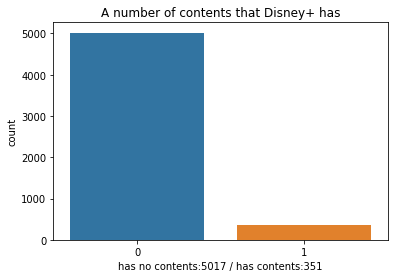

In [20]:
contents_disney = pd.DataFrame(df_ott['Disney+'].value_counts()).reset_index()

sns.barplot(x=contents_disney['index'], y=contents_disney['Disney+'])
plt.title('A number of contents that Disney+ has')
plt.xlabel('has no contents:{} / has contents:{}'.format(contents_disney['Disney+'][0], contents_disney['Disney+'][1]))
plt.ylabel('count')
plt.show()

Comparing amount of contents between companies


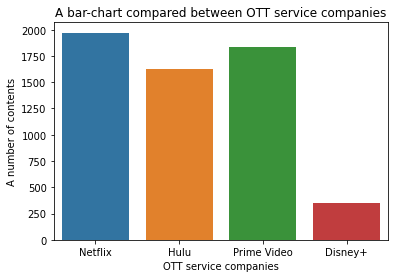

In [21]:
contents = [contents_netflix['Netflix'][1], contents_hulu['Hulu'][1], contents_prime['Prime Video'][1], contents_disney['Disney+'][1]]
company = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

sns.barplot(x=company, y=contents)
plt.title('A bar-chart compared between OTT service companies')
plt.xlabel('OTT service companies')
plt.ylabel('A number of contents')
plt.show()

# amount of contents(age)

In [ ]:
amount_age = pd.DataFrame(df_ott['Age'].value_counts()).reset_index()
amount_age

,index,Age
0,16+,995
1,18+,854
2,7+,831
3,all,552
4,13+,9


A number of contents classified by age limitation

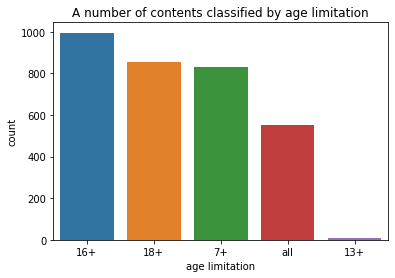

In [ ]:
sns.barplot(x=amount_age['index'], y=amount_age['Age'])

plt.title('A number of contents classified by age limitation')
plt.xlabel('age limitation')
plt.ylabel('count')
plt.show()

# IMDb score analysis

A mean of IMDb score Comparison graph

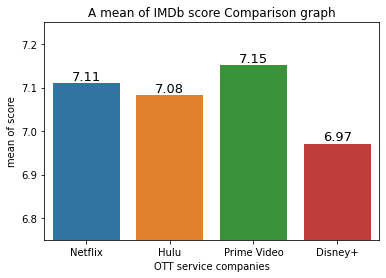

In [22]:
netflix_mean_imdb = df_ott[df_ott['Netflix']==1]['IMDb'].mean()
hulu_mean_imdb = df_ott[df_ott['Hulu']==1]['IMDb'].mean()
prime_mean_imdb = df_ott[df_ott['Prime Video']==1]['IMDb'].mean()
disney_mean_imdb = df_ott[df_ott['Disney+']==1]['IMDb'].mean()

company = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
imdb_mean_score = [netflix_mean_imdb, hulu_mean_imdb,
                   prime_mean_imdb, disney_mean_imdb]

imdb_mean_score_round = []
for i in range(4):
  imdb_mean_score_round.append(round(imdb_mean_score[i],2))

sns.barplot(x=company, y=imdb_mean_score)
plt.title('A mean of IMDb score Comparison graph')
plt.xlabel('OTT service companies')
plt.ylabel('mean of score')
plt.ylim([6.75, 7.25])
for i in range(4):
    plt.text(i, imdb_mean_score[i], imdb_mean_score_round[i],
             fontsize = 13,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

A median of IMDb score Comparison graph

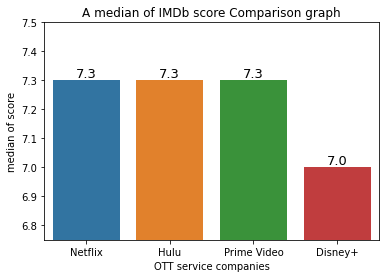

In [23]:
netflix_median_imdb = df_ott[df_ott['Netflix']==1]['IMDb'].median()
hulu_median_imdb = df_ott[df_ott['Hulu']==1]['IMDb'].median()
prime_median_imdb = df_ott[df_ott['Prime Video']==1]['IMDb'].median()
disney_median_imdb = df_ott[df_ott['Disney+']==1]['IMDb'].median()

company = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
imdb_median_score = [netflix_median_imdb, hulu_median_imdb,
                     prime_median_imdb, disney_median_imdb]

sns.barplot(x=company, y=imdb_median_score)
plt.title('A median of IMDb score Comparison graph')
plt.xlabel('OTT service companies')
plt.ylabel('median of score')
plt.ylim([6.75, 7.5])
for i in range(4):
    plt.text(i, imdb_median_score[i], imdb_median_score[i],
             fontsize = 13,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

# Rotten Tomatoes score analysis

A mean of Rotten Tomatoes score Comparison graph

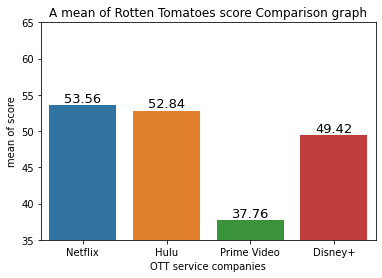

In [24]:
netflix_mean_rotten = df_ott[df_ott['Netflix']==1]['Rotten Tomatoes'].mean()
hulu_mean_rotten = df_ott[df_ott['Hulu']==1]['Rotten Tomatoes'].mean()
prime_mean_rotten = df_ott[df_ott['Prime Video']==1]['Rotten Tomatoes'].mean()
disney_mean_rotten = df_ott[df_ott['Disney+']==1]['Rotten Tomatoes'].mean()

company = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
rotten_mean_score = [netflix_mean_rotten, hulu_mean_rotten,
                     prime_mean_rotten, disney_mean_rotten]

rotten_mean_score_round = []
for i in range(4):
  rotten_mean_score_round.append(round(rotten_mean_score[i],2))

sns.barplot(x=company, y=rotten_mean_score)
plt.title('A mean of Rotten Tomatoes score Comparison graph')
plt.xlabel('OTT service companies')
plt.ylabel('mean of score')
plt.ylim([35, 65])
for i in range(4):
    plt.text(i, rotten_mean_score[i], rotten_mean_score_round[i],
             fontsize = 13,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

A median of Rotten Tomatoes score Comparison graph

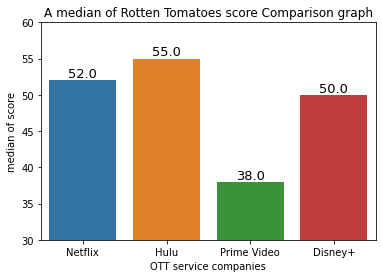

In [25]:
netflix_median_rotten = df_ott[df_ott['Netflix']==1]['Rotten Tomatoes'].median()
hulu_median_rotten = df_ott[df_ott['Hulu']==1]['Rotten Tomatoes'].median()
prime_median_rotten = df_ott[df_ott['Prime Video']==1]['Rotten Tomatoes'].median()
disney_median_rotten = df_ott[df_ott['Disney+']==1]['Rotten Tomatoes'].median()

company = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
rotten_median_score = [netflix_median_rotten, hulu_median_rotten,
                     prime_median_rotten, disney_median_rotten]

sns.barplot(x=company, y=rotten_median_score)
plt.title('A median of Rotten Tomatoes score Comparison graph')
plt.xlabel('OTT service companies')
plt.ylabel('median of score')
plt.ylim([30, 60])
for i in range(4):
    plt.text(i, rotten_median_score[i], rotten_median_score[i],
             fontsize = 13,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

# histogram of scores

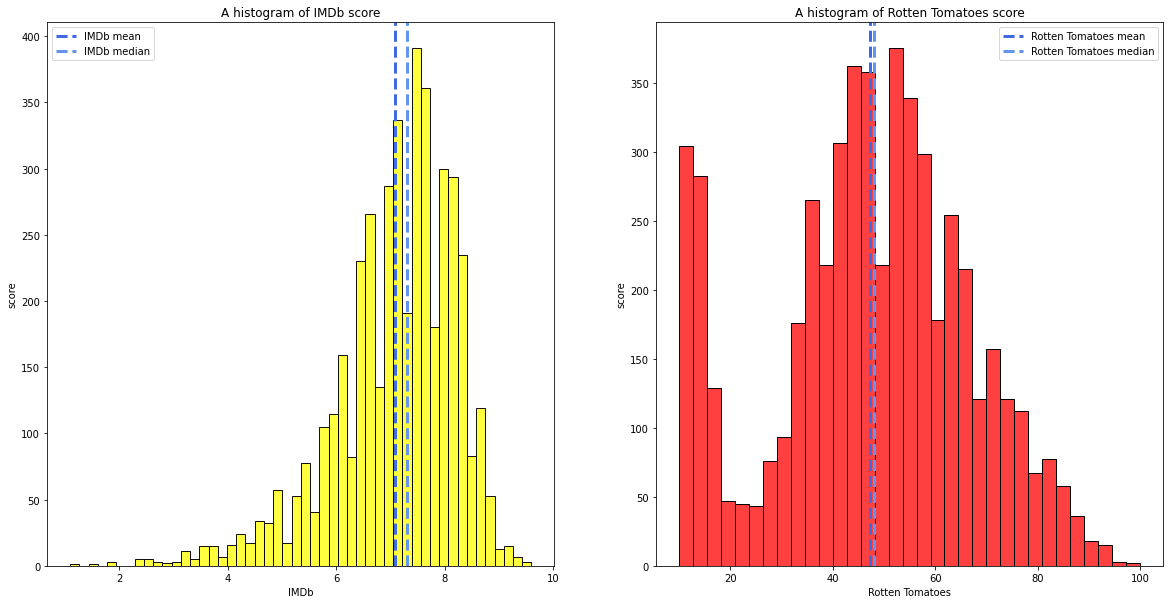

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

imdb = sns.histplot(df_ott['IMDb'], color='yellow', ax=axes[0])
imdb.set_title('A histogram of IMDb score')
imdb.set_xlabel('IMDb')
imdb.set_ylabel('score')
imdb.axvline(x=df_ott['IMDb'].mean(), ymin=0, ymax=1, 
             label = 'IMDb mean', color='royalblue', linestyle='--', linewidth=3)
imdb.axvline(x=df_ott['IMDb'].median(), ymin=0, ymax=1, 
             label = 'IMDb median', color='cornflowerblue', linestyle='--', linewidth=3)
imdb.legend(loc='upper left')

rotten = sns.histplot(df_ott['Rotten Tomatoes'], color='red', ax=axes[1])
rotten.set_title('A histogram of Rotten Tomatoes score')
rotten.set_xlabel('Rotten Tomatoes')
rotten.set_ylabel('score')
rotten.axvline(x=df_ott['Rotten Tomatoes'].mean(), ymin=0, ymax=1, 
               label = 'Rotten Tomatoes mean', color='royalblue', linestyle='--', linewidth=3)
rotten.axvline(x=df_ott['Rotten Tomatoes'].median(), ymin=0, ymax=1, 
               label = 'Rotten Tomatoes median', color='cornflowerblue', linestyle='--', linewidth=3)
rotten.legend(loc='upper right')

plt.show()